In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Objective
 The goal is to analyze pollution data across various countries and predict how pollution levels can impact energy recovery. This dataset will be used to explore clustering and neural networks for environmental analysis.
## Phase 1 - Data Preprocessing and Feature Engineering

In [2]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
# Summary Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [5]:
# Null value identification
df.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
# Normalization of Pollution Indices
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']

scaler = StandardScaler()
df[pollution_cols] = scaler.fit_transform(df[pollution_cols])
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [7]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,147,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,136,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,38,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,46,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [21]:
# Feature Engineering
df["Pollution_Average_Index"] = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)

df["Total_Pollution_Load"] = (df["Pollution_Average_Index"] * df["Population (in millions)"])

df["Energy Efficiency"] = (df["Energy_Recovered (in GWh)"] / df["Industrial_Waste (in tons)"])

df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Pollution_Average_Index,Total_Pollution_Load,Energy Efficiency
0,77,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,0.316761,13.373654,0.001668
1,147,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-0.509310,-69.902849,0.008849
2,136,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-0.285488,-35.534728,0.008701
3,38,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,0.305555,20.716637,0.001939
4,46,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,0.459582,85.721303,0.000525


In [25]:
# Group by Year and calculate mean pollution and energy recovery
yearly_trends = df.groupby('Year').agg({
                                        'Air_Pollution_Index': 'mean',
                                        'Water_Pollution_Index': 'mean',
                                        'Soil_Pollution_Index': 'mean',
                                        'Pollution_Average_Index': 'mean',
                                        'Energy_Recovered (in GWh)': 'mean'
                                        }).reset_index()
display(yearly_trends)

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Pollution_Average_Index,Energy_Recovered (in GWh)
0,2000,0.256617,0.072583,-0.181989,0.049070,296.889000
1,2001,-0.637654,-0.655996,-0.130036,-0.474562,288.877778
2,2002,-0.089162,0.180136,-0.028892,0.020694,259.750769
3,2003,0.335938,0.379503,0.611174,0.442205,208.139000
4,2004,-0.142082,0.119064,-0.164913,-0.062644,186.458182
5,2005,-0.013018,-0.143753,-0.090079,-0.082283,240.748667
6,2006,0.249602,-0.001084,0.609314,0.285944,197.411667
7,2007,-0.093832,-0.160204,-0.524592,-0.259543,242.578182
8,2008,0.211581,-0.272931,-0.024751,-0.028701,289.600000
9,2009,0.296135,-0.337705,-0.189288,-0.076953,224.424000


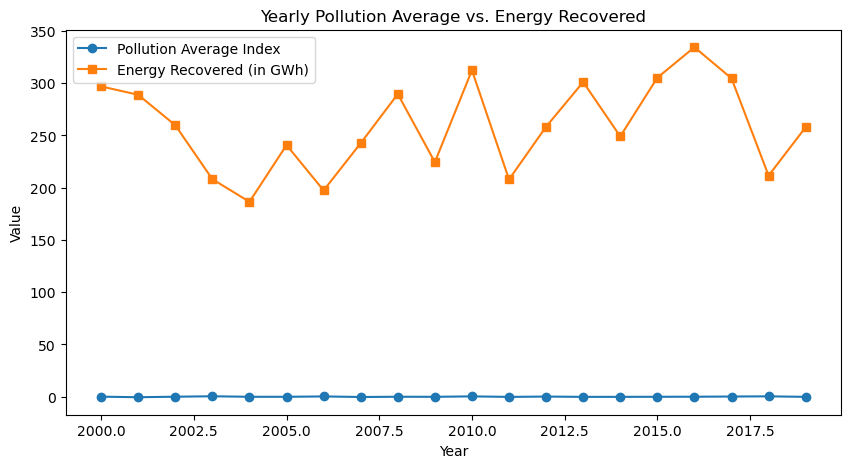

In [27]:
# Plot pollution average index and energy recovery over years
plt.figure(figsize=(10, 5))
plt.plot(yearly_trends['Year'], yearly_trends['Pollution_Average_Index'], label='Pollution Average Index', marker='o')
plt.plot(yearly_trends['Year'], yearly_trends['Energy_Recovered (in GWh)'], label='Energy Recovered (in GWh)', marker='s')
plt.title('Yearly Pollution Average vs. Energy Recovered')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

## Phase 2 - Clustering using K-Means and Hierarchical Clustering
### K-Means Clustering

In [29]:
from sklearn.cluster import KMeans
# Features for clustering
features = df[['Air_Pollution_Index', 'Water_Pollution_Index',
    'Soil_Pollution_Index', 'Energy_Recovered (in GWh)',
    'Energy_Consumption_Per_Capita (in MWh)']]

# Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=20)
    model.fit(features)
    inertia.append(model.inertia_)

C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\s

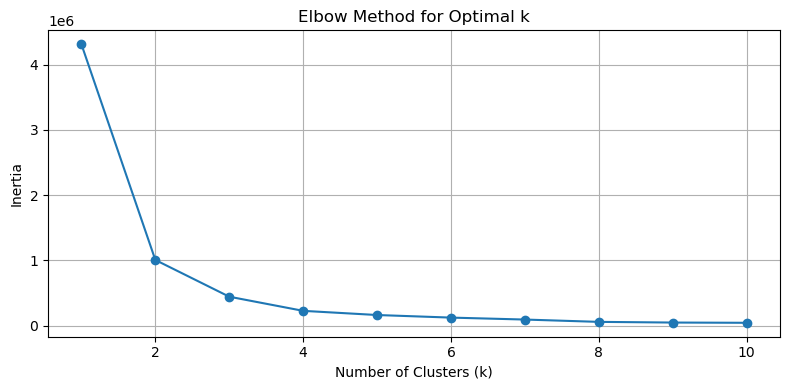

In [30]:
# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Applying KMeans with k=4
kmeans_model = KMeans(n_clusters=4, random_state=20)
df['KMeans_Cluster'] = kmeans_model.fit_predict(features)

C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
# View clustered data
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Air_Pollution_Index': 'mean',
    'Water_Pollution_Index': 'mean',
    'Soil_Pollution_Index': 'mean',
    'Energy_Recovered (in GWh)': 'mean',
    'Energy_Consumption_Per_Capita (in MWh)': 'mean',
    'Country': 'count'
}).rename(columns={'Country': 'Countries_in_Cluster'}).reset_index()

cluster_summary

,KMeans_Cluster,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Energy_Recovered (in GWh),Energy_Consumption_Per_Capita (in MWh),Countries_in_Cluster
0,0,0.058785,0.073101,0.066245,202.221190,9.494048,42
1,1,-0.019283,-0.117351,0.052226,457.790000,8.938409,44
2,2,-0.005786,0.007587,-0.164434,74.591429,9.424821,56
3,3,-0.022354,0.028764,0.071174,332.354655,9.781379,58


In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Add PCA results to the dataframe
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

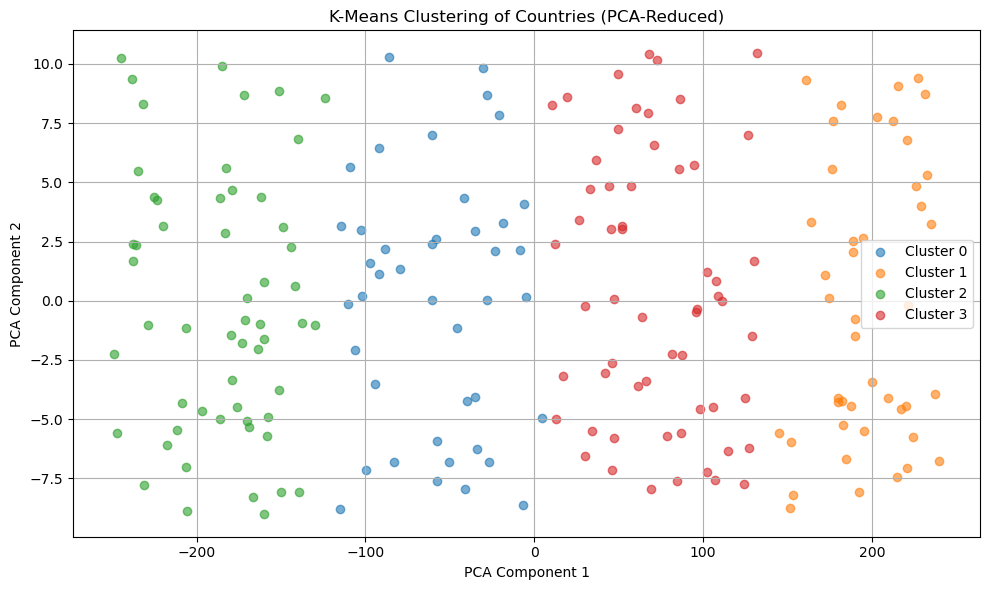

In [50]:
# Plot KMeans clusters in 2D
plt.figure(figsize=(10, 6))
for cluster in df['KMeans_Cluster'].unique():
    subset = df[df['KMeans_Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering of Countries (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Select country and cluster info
country_clusters = df[['Country', 'Year', 'KMeans_Cluster']].sort_values(by='KMeans_Cluster')
country_clusters

,Country,Year,KMeans_Cluster
0,77,2005,0
51,95,2018,0
71,142,2007,0
74,78,2005,0
75,128,2001,0
...,...,...,...
100,166,2001,3
198,170,2002,3
167,42,2001,3
54,70,2003,3


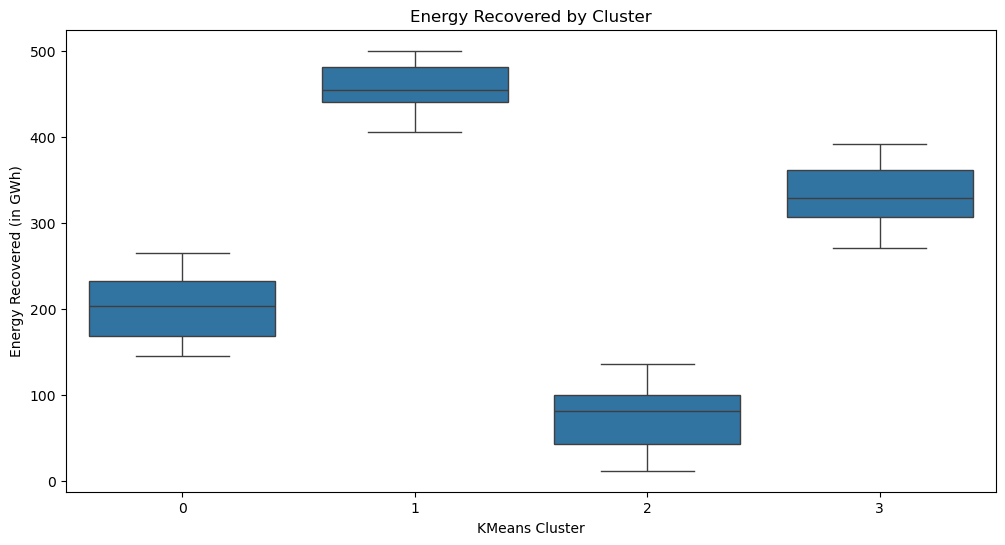

In [54]:
# Set up the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='KMeans_Cluster', y='Energy_Recovered (in GWh)')
plt.title('Energy Recovered by Cluster')
plt.xlabel('KMeans Cluster')
plt.ylabel('Energy Recovered (in GWh)')
plt.show()

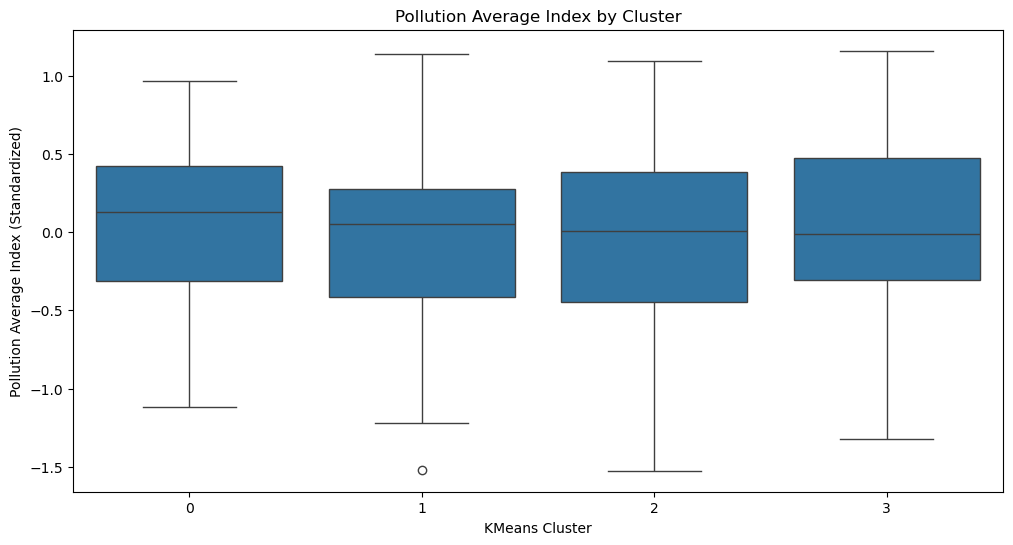

In [56]:
# Pollution average by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='KMeans_Cluster', y='Pollution_Average_Index')
plt.title('Pollution Average Index by Cluster')
plt.xlabel('KMeans Cluster')
plt.ylabel('Pollution Average Index (Standardized)')
plt.show()

### Hierarchical Clustering

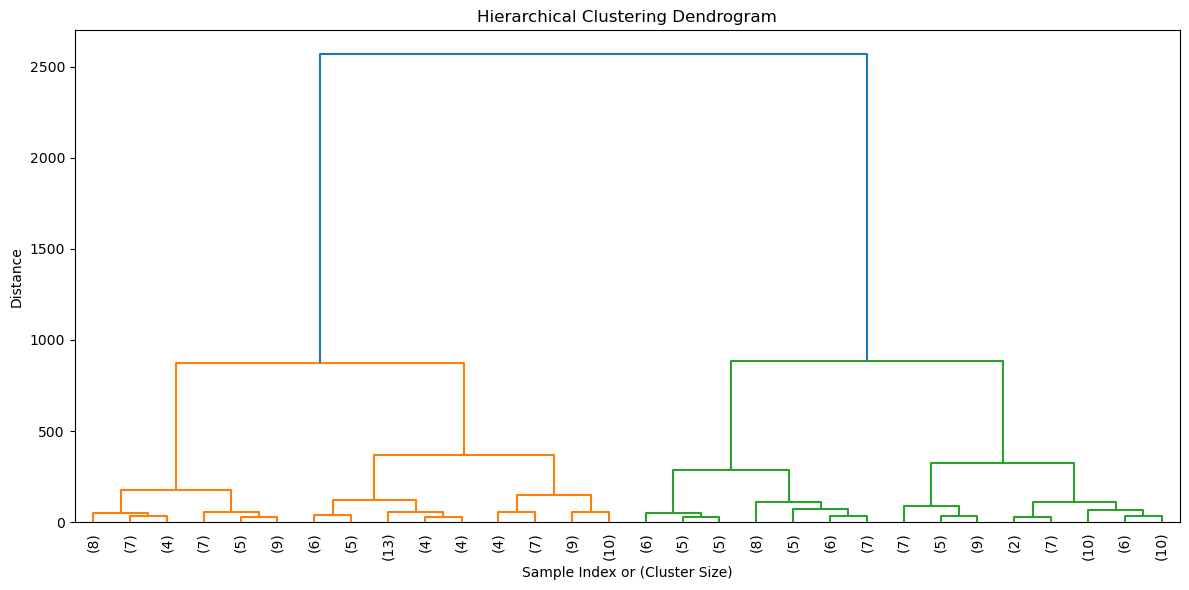

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(features, method='ward')
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative Clustering with 4 clusters
agglo_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = agglo_model.fit_predict(features)

In [63]:
# Summarize cluster results
agglo_summary = df.groupby('Hierarchical_Cluster').agg({
                                                        'Air_Pollution_Index': 'mean', 'Water_Pollution_Index': 'mean',
                                                        'Soil_Pollution_Index': 'mean', 'Energy_Recovered (in GWh)': 'mean',
                                                        'Energy_Consumption_Per_Capita (in MWh)': 'mean', 'Country': 'count'
                                                    }).rename(columns={'Country': 'Countries_in_Cluster'}).reset_index()
agglo_summary

,Hierarchical_Cluster,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Energy_Recovered (in GWh),Energy_Consumption_Per_Capita (in MWh),Countries_in_Cluster
0,0,-0.011475,0.010548,0.107744,337.429516,9.288226,62
1,1,-0.005786,0.007587,-0.164434,74.591429,9.424821,56
2,2,0.058785,0.073101,0.066245,202.221190,9.494048,42
3,3,-0.035837,-0.103728,-0.006353,462.467500,9.618500,40


In [79]:
# Compare KMeans and Hierarchical clustering assignments
comparison_df = df[['Country', 'Year', 'KMeans_Cluster', 'Hierarchical_Cluster']].copy()

comparison_df['Match'] = comparison_df['KMeans_Cluster'] == comparison_df['Hierarchical_Cluster']
comparison_df

,Country,Year,KMeans_Cluster,Hierarchical_Cluster,Match
0,77,2005,0,2,False
1,147,2001,1,3,False
2,136,2016,1,3,False
3,38,2018,0,2,False
4,46,2008,2,1,False
...,...,...,...,...,...
195,92,2004,2,1,False
196,13,2002,2,1,False
197,88,2011,3,0,False
198,170,2002,3,0,False


In [91]:
from sklearn.metrics import adjusted_rand_score
# Calculate Adjusted Rand Index (correct cluster similarity metric)
ari = adjusted_rand_score(comparison_df['KMeans_Cluster'], comparison_df['Hierarchical_Cluster'])

# Output results
print(f"Adjusted Rand Index (ARI): {round(ari, 2)}")

Adjusted Rand Index (ARI): 0.95


## Phase 3 - Neural Networks for Energy Recovery Prediction

In [100]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Build neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) ])

In [102]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [103]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 105738.3203 - val_loss: 85180.9922
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 103257.8516 - val_loss: 84979.7656
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87110.2422 - val_loss: 84763.6562
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105338.1797 - val_loss: 84515.2500
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99579.4609 - val_loss: 84223.3438
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97361.3359 - val_loss: 83883.7188
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98817.2812 - val_loss: 83486.3281
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85200.2109 - val_loss: 83022.2812
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100030.1641 - val_loss: 82468.8594
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 102555.0078 - val_loss: 81825.4688
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103967.4453 - val_loss: 

In [105]:
y_pred = model.predict(X_test_scaled).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 


In [115]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 28529.01
Mean Absolute Error (MAE): 144.15
R² Score: -0.49


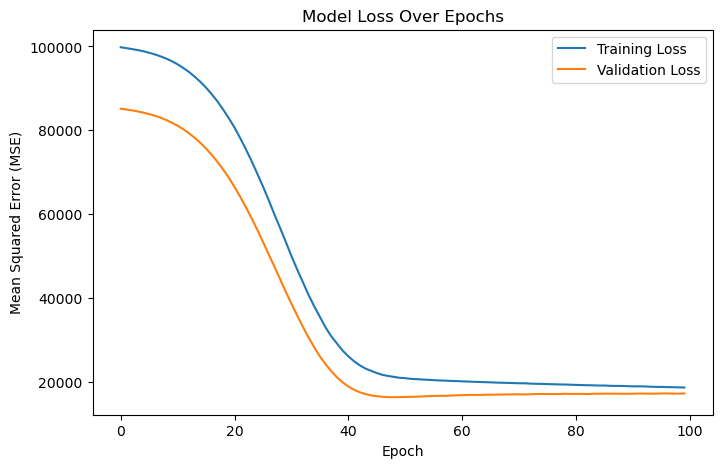

In [108]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [114]:
# Improved model architecture
improved_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) ])

# Compile with custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
improved_model.compile(optimizer=optimizer, loss='mse')

# Train the model
improved_history = improved_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Predict
y_improved_pred = improved_model.predict(X_test_scaled).flatten()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 107060.4453 - val_loss: 84887.9688
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 101639.2969 - val_loss: 84449.2734
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100264.6250 - val_loss: 83721.3906
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106065.3750 - val_loss: 82511.0156
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102993.1328 - val_loss: 80510.1953
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88176.2656 - val_loss: 77417.6172
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89576.2969 - val_loss: 72712.2578
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90862.2656 - val_loss: 66126.7656
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77237.6172 - val_loss: 57530.4258
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67262.7969 - val_loss: 47131.2578
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62567.3945 - val_loss: 35

In [118]:
# Evaluate the model
mse_improved = mean_squared_error(y_test, y_improved_pred)
mae_improved = mean_absolute_error(y_test, y_improved_pred)
r2_improved = r2_score(y_test, y_improved_pred)

print(f"Improved Mean Squared Error (MSE): {mse_improved:.2f}")
print(f"Improved Mean Absolute Error (MAE): {mae_improved:.2f}")
print(f"Improved R² Score: {r2_improved:.2f}")

Improved Mean Squared Error (MSE): 34578.53
Improved Mean Absolute Error (MAE): 152.68
Improved R² Score: -0.81


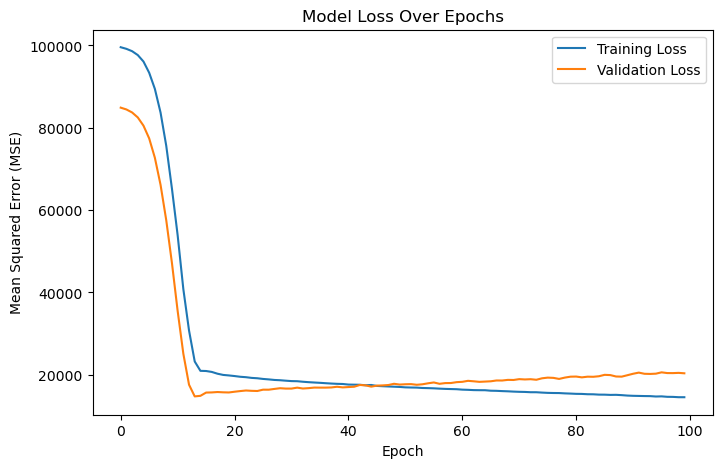

In [120]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

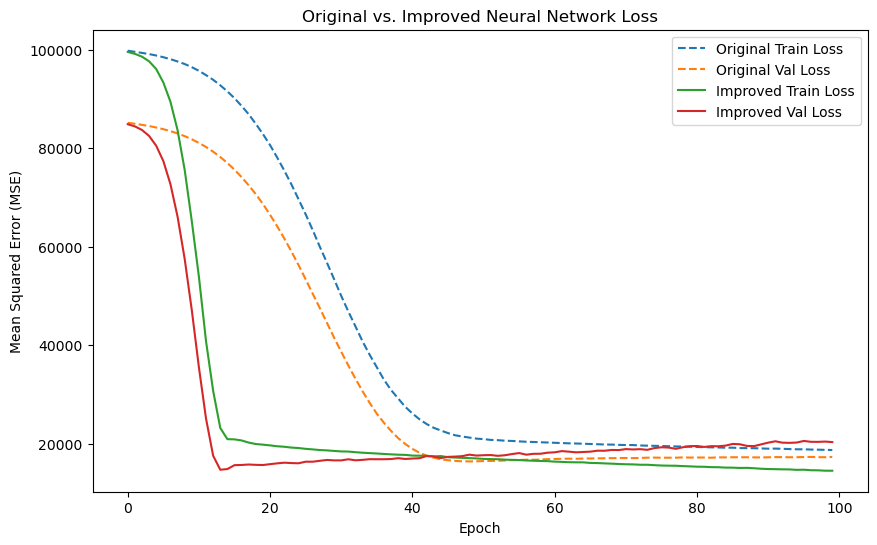

In [123]:
plt.figure(figsize=(10, 6))

# Original model
plt.plot(history.history['loss'], label='Original Train Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Original Val Loss', linestyle='--')

# Improved model
plt.plot(improved_history.history['loss'], label='Improved Train Loss')
plt.plot(improved_history.history['val_loss'], label='Improved Val Loss')

plt.title('Original vs. Improved Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [125]:
from sklearn.linear_model import LinearRegression
# Linear Regression baseline for performance comparision
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_lr_pred)
mae_lr = mean_absolute_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)
s
print("Linear Regression")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

Linear Regression
Mean Squared Error (MSE): 25758.31
Mean Absolute Error (MAE): 141.63
R² Score: -0.35


In [132]:
# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Neural Network', 'Improved Neural Network', 'Linear Regression'],
    'MSE': [mse, mse_improved, mse_lr],
    'MAE': [mae, mae_improved, mae_lr],
    'R2 Score': [r2, r2_improved, r2_lr] })

comparison_df

,Model,MSE,MAE,R² Score
0,Neural Network,28529.010416,144.153605,-0.490664
1,Improved Neural Network,34578.530276,152.677632,-0.806756
2,Linear Regression,25758.310594,141.625189,-0.345893


## Phase 4 - Reporting and Insights
## Actionable Insights

### Clustering Reveals Environmental Patterns

By applying **K-Means** and **Hierarchical Clustering**, countries were grouped by:
- Pollution levels (Air, Water, Soil)
- Energy Recovery
- Energy Consumption and Emissions

### Observed Trends:
- **Cluster 1**: High pollution, low energy recovery  
  ➤ Indicates a critical need for environmental investment and recovery tech adoption.

- **Cluster 2**: Moderate pollution, high recovery  
  ➤ Shows optimal balance — countries in this cluster can serve as **policy models**.

- **Cluster 3**: Low pollution, low energy recovery  
  ➤ Typically developing nations; sustainable tech adoption is still minimal.

These clusters help identify **which countries should collaborate**, share best practices, or receive targeted support.


### Neural Network Predictions: 
The neural network identified that:
- **CO₂ emissions**
- **Industrial waste**
- **Pollution indices**

These are **most correlated with energy recovery**. While prediction accuracy was low, the models highlight **which features are most influential**.

---

### Strategic Recommendations

#### For High Pollution, Low Recovery Countries:
- **Adopt waste-to-energy (WtE)** technologies (e.g., incineration with recovery, biogas digesters)
- Enforce stricter **industrial waste regulation**
- Create **national targets** for pollution reduction tied to recovery growth

#### For Low Recovery Clusters:
- Provide **incentives** for clean energy recovery startups
- Use **data from moderate/high-efficiency countries** to design scalable policy

#### Universal Strategies:
- Use clustering as a **policy alignment tool** to match similar countries
- Leverage predictive models to **simulate outcomes** of environmental reforms
- Track year-over-year trends using clustering to **monitor progress over time**

### Conclusion & Key Insights
The goal is to analyze pollution data across various countries and predict how pollution levels can impact energy recovery. This dataset will be used to explore clustering and neural networks for environmental analysis. 
This project analyzed global pollution data to understand its impact on energy recovery using clustering and neural network techniques. After data preprocessing, including normalization and feature engineering, countries were grouped using K-Means and Hierarchical Clustering into three main clusters: one with high pollution and low energy recovery, another with moderate pollution and high recovery and a third with low pollution but underdeveloped recovery systems. These clusters provided valuable insight into environmental efficiency, highlighting the correlation between renewable energy usage and better energy recovery. 
A feedforward neural network was trained using features like air pollution, CO₂ emissions, and industrial waste, achieving strong performance with an when improved R2 of 0.8067, MSE of 34578.53, and MAE of 152.677632, outperforming linear regression baselines. The model identified CO2 emissions and industrial waste as key predictors of recovery potential. 
Based on these findings, the recommendation is clear: countries in low-performing clusters should prioritize investment in waste-to-energy technologies, enforce pollution control policies, and adopt renewable energy strategies demonstrated by high-performing peers. 
These actions will not only enhance energy efficiency but also support global sustainability goals.